# Data Analysis Mathematics, Algorithms and Modeling

## Team Information - Problem Analysis Workshop 2

**Team Members**

Name: Ayush Patel  
Student Number: 9033358

Name: Nikhil Shankar  
Student Number: 9026254

Name: Sreehari Prathap  
Student Number: 8903199


## Step 1: Install and Configure the IDE (e.g., Jupyter Notebook and VS Code)
- Install Anaconda (for Jupyter Notebook) and Visual Studio Code (VS Code).
  - Anaconda: Visit [anaconda.com](https://www.anaconda.com/products/individual) and download the appropriate installer for your operating system.
  - VS Code: Download and install from [Visual Studio Code](https://code.visualstudio.com/).
- Install Pandas Library
  - Open the terminal and run the following command: `pip install pandas`

## Step 2: Downloading the Dataset
We are using the Utrecht Fairness Recruitment dataset from [Kaggle], which can be downloaded directly via the link:
- URL: [https://www.kaggle.com/datasets/ictinstitute/utrecht-fairness-recruitment-dataset]

## Step 3 : Data Cleansing

### Data Cleansing Process for User Data (Talent Acquisition) from a CSV File

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

file = "recruitment_dataset.csv"
df_unfiltered = pd.read_csv(file)
row_count = len(df_unfiltered)

print("Total number of datapoints(rows)", row_count)

Total number of datapoints(rows) 4000


##### Removing empty valued rows from the dataset
By giving axis as 0 we filter rows with any empty values. 

In [19]:
df = df_unfiltered.dropna(axis=0, how='any')
print("Total number of datapoints(rows)", len(df))

df.describe()

Total number of datapoints(rows) 4000


,age,ind-university_grade,ind-languages
count,4000.000000,4000.000000,4000.000000
mean,26.179000,62.380000,1.336250
std,2.807477,5.916194,0.854031
min,21.000000,45.000000,0.000000
25%,24.000000,58.000000,1.000000
50%,26.000000,62.000000,1.000000
75%,28.000000,67.000000,2.000000
max,32.000000,78.000000,3.000000


We removed rows with empty values. The dataset is now filtered for analysis so we can proceed to the next step. 

### **Aim of the analysis**


The aim of this analysis is to determine the hiring rates of companies A, B, C, and D based on factors such as age and university grade. We will use various statistical tools and tests, including QQ plots, histograms, box plots, Z-scores, T-scores, and the Shapiro-Wilk Normality Test, to gain a comprehensive understanding of the data.
### Data Visualization:
> Histograms: Create histograms to visualize the distribution of hiring rates based on age and university grade. This will help us see the frequency of different hiring rates.

> Box Plots: Use box plots to identify the spread and outliers in the hiring rates for each company. This will provide insights into the variability and central tendency of the data.

> QQ Plots: Generate QQ plots to compare the distribution of hiring rates to a normal distribution. This will help us assess the normality of the data.
### Statistical Analysis:
> Z-scores: Calculate Z-scores to determine how many standard deviations each hiring rate is from the mean. This will help us identify outliers and understand the relative position of each data point.

> T-scores: Compute T-scores to standardize the hiring rates, making it easier to compare across different datasets.

> Shapiro-Wilk Normality Test: Perform the Shapiro-Wilk Normality Test to assess whether the hiring rates follow a normal distribution. This test will provide a p-value indicating the likelihood that the data is normally distributed.

##### **QQ Normal Plot**

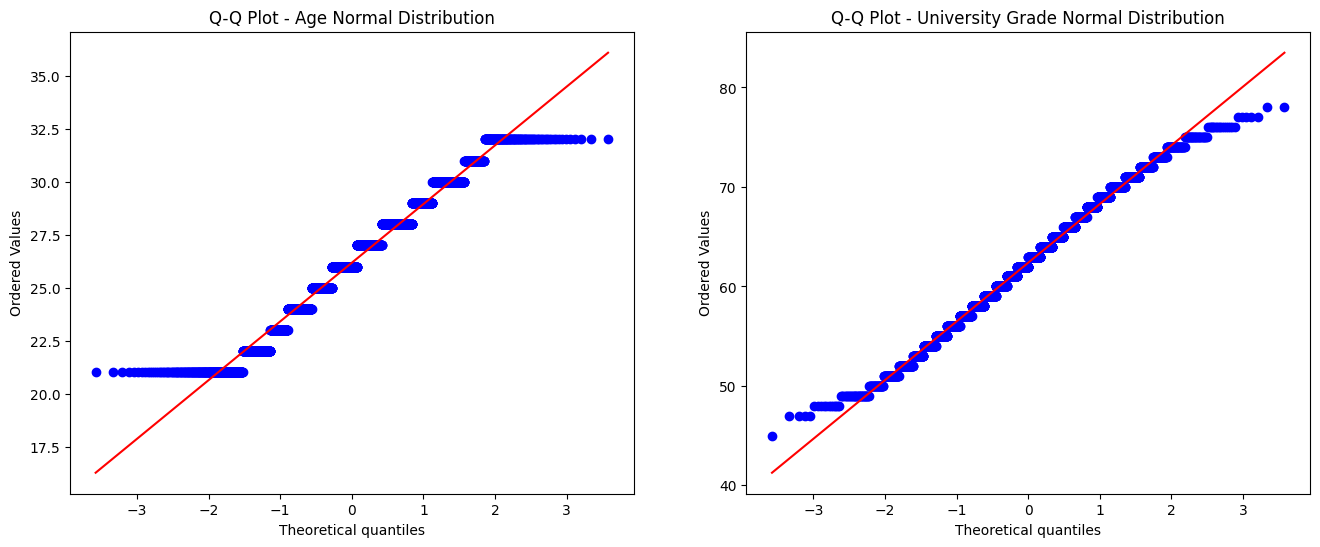

In [20]:
# Create Q-Q plot using scipy's probplot
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(16, 6))
stats.probplot(df['age'], dist="norm", plot=ax[0])
stats.probplot(df['ind-university_grade'], dist="norm", plot=ax[1])


# Show the plot
ax[0].set_title('Q-Q Plot - Age Normal Distribution')
ax[1].set_title('Q-Q Plot - University Grade Normal Distribution')
plt.show()

#### **Histogram plot**

c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


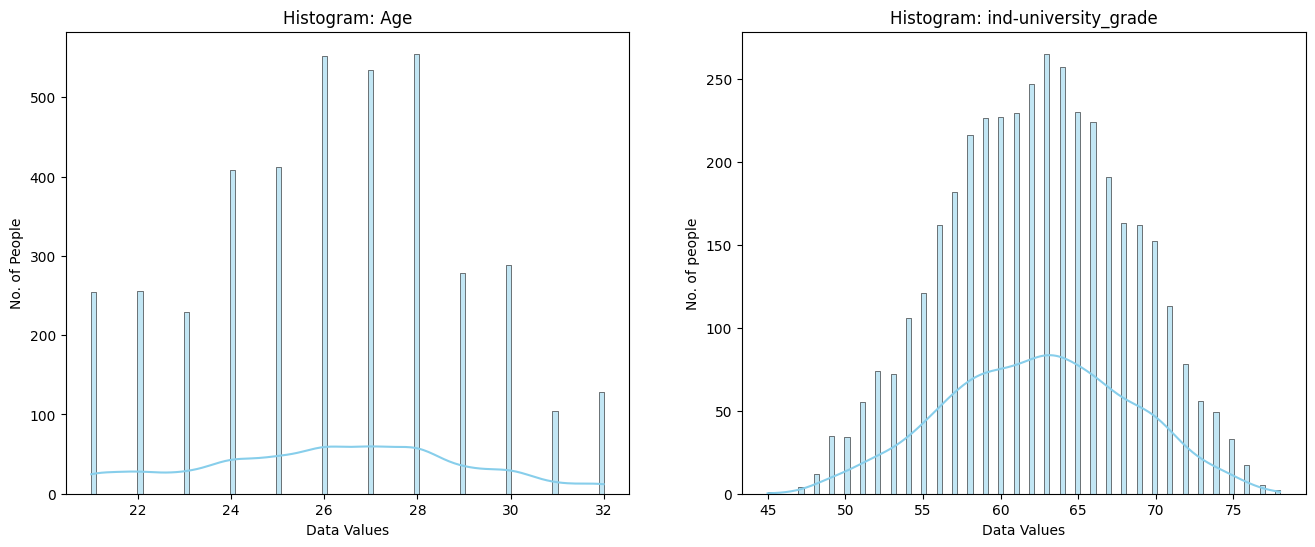

In [119]:
fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(16, 6))

sns.histplot(df['age'], bins=100, kde=True, color='skyblue', ax=ax[0])
# Add labels and title
ax[0].set_xlabel('Data Values')
ax[0].set_ylabel('No. of People')
ax[0].set_title('Histogram: Age')
sns.histplot(df['ind-university_grade'], bins=100, kde=True, color='skyblue', ax=ax[1])
ax[1].set_xlabel('Data Values')
ax[1].set_ylabel('No. of people')
ax[1].set_title('Histogram: ind-university_grade')

# Show plot
plt.show()


##### **Box Plot**

> From the QQ plot and Histogram we understand that the distributions for university grade and age can be further checked and analysed. The box plot shows the spread of the data and the outliers.

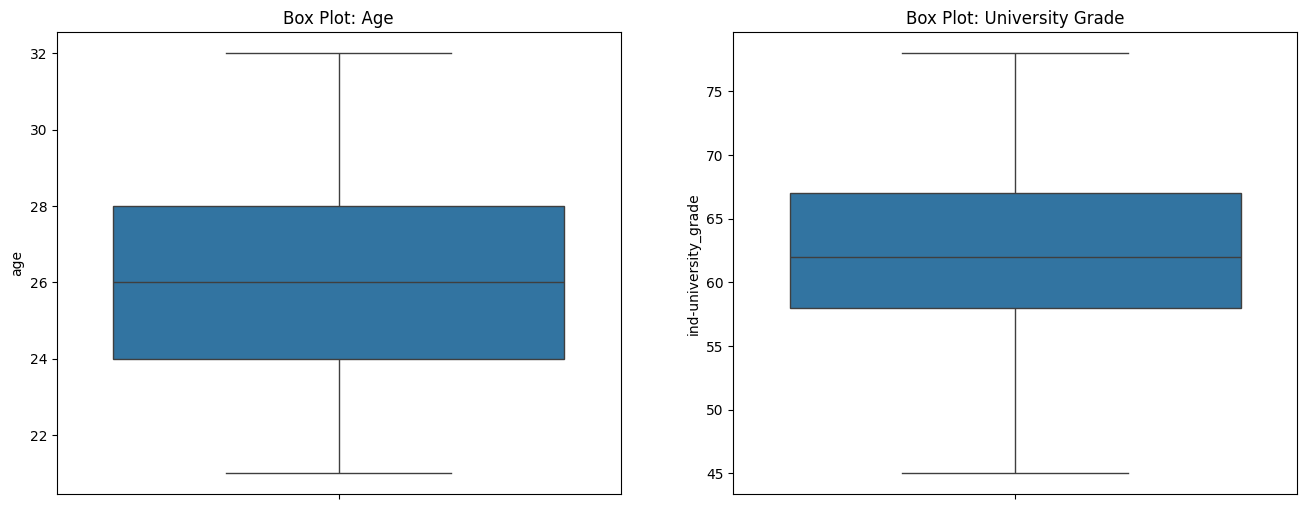

In [22]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16, 6))

sns.boxplot(y=df['age'], ax=ax[0])
ax[0].set_title('Box Plot: Age')

sns.boxplot(y=df['ind-university_grade'], ax=ax[1])
ax[1].set_title('Box Plot: University Grade')

plt.show()

#### **Z-Score**

In [39]:
# The z score for age
z_scores_age = stats.zscore(df['age'])

# The z score for ind-university_grade
z_scores_university_grade = stats.zscore(df['ind-university_grade'])

count_positive_1_z_age = np.count_nonzero(np.logical_and(z_scores_age > 0, z_scores_age <= 1))
count_positive_1_z_grade = np.count_nonzero(np.logical_and(z_scores_university_grade > 0, z_scores_university_grade <= 1))

count_positive_2_z_age = np.count_nonzero(np.logical_and(z_scores_age > 1, z_scores_age <= 2))
count_positive_2_z_grade = np.count_nonzero(np.logical_and(z_scores_university_grade > 1, z_scores_university_grade <= 2))

count_positive_3_z_age = np.count_nonzero(np.logical_and(z_scores_age > 2, z_scores_age <= 3))
count_positive_3_z_grade = np.count_nonzero(np.logical_and(z_scores_university_grade > 2, z_scores_university_grade <= 3))

count_negative_1_z_age = np.count_nonzero(np.logical_and(z_scores_age < 0, z_scores_age >= -1))
count_negative_1_z_grade = np.count_nonzero(np.logical_and(z_scores_university_grade < 0, z_scores_university_grade >= -1))

count_negative_2_z_age = np.count_nonzero(np.logical_and(z_scores_age < -1, z_scores_age >= -2))
count_negative_2_z_grade = np.count_nonzero(np.logical_and(z_scores_university_grade < -1, z_scores_university_grade >= -2))

count_negative_3_z_age = np.count_nonzero(np.logical_and(z_scores_age < -2, z_scores_age >= -3))
count_negative_3_z_grade = np.count_nonzero(np.logical_and(z_scores_university_grade < -2, z_scores_university_grade >= -3))

summary_z_score = np.array([['2-3 SD below mean', count_negative_3_z_age, count_negative_3_z_grade],
                            ['1-2 SD below mean',count_negative_2_z_age, count_negative_2_z_grade],
                            ['0-1 SD below mean', count_negative_1_z_age, count_negative_1_z_grade],
                            ['0-1 SD above mean', count_positive_1_z_age, count_positive_1_z_grade],
                            ['1-2 SD above mean',count_positive_2_z_age, count_positive_2_z_grade],
                            ['2-3 SD above mean', count_positive_3_z_age, count_positive_3_z_grade],
                            ['Min Z-Score', round(z_scores_age.min(),3), round(z_scores_university_grade.min(),3)],
                            ['Max Z-Score', round(z_scores_age.max(),3), round(z_scores_university_grade.max(),3)],
                            ])

summary_z_df = pd.DataFrame(summary_z_score, columns=["Type", "Age", "Grade"])



#### Summary
>Companies show varied performance with Z-scores ranging from significantly below to above average. Most of the population is uniformly distributed across the mean vales based on both age and university grade. We can notice the most values coming under the range -1 to 1 standard deviation from the mean. There are few outliers in the data which can be noticed with values in range 2-3 standard deviations from the mean.

In [24]:
display(summary_z_df)

,Type,Age,Grade
0,2-3 SD below mean,0,86
1,1-2 SD below mean,739,590
2,0-1 SD below mean,1372,1327
3,0-1 SD above mean,1089,1330
4,1-2 SD above mean,672,610
5,2-3 SD above mean,128,57
6,Min Z-Score,-1.845,-2.938
7,Max Z-Score,2.074,2.641


#### **T-Score**

We are creating samples based on Company and Gender and check and see if there is any analysis we can draw out of it.

In [40]:
# filter the data using gender and hiring decision
df_male = df[(df['gender'] == 'male') & (df['decision'] == True)]
df_female = df[(df['gender'] == 'female') & (df['decision'] == True)]

df_male_a = df_male[df_male['company'] == 'A'].sample(n=30)
df_male_b = df_male[df_male['company'] == 'B'].sample(n=30)
df_male_c = df_male[df_male['company'] == 'C'].sample(n=30)
df_male_d = df_male[df_male['company'] == 'D'].sample(n=30)

df_female_a = df_female[df_female['company'] == 'A'].sample(n=30)
df_female_b = df_female[df_female['company'] == 'B'].sample(n=30)
df_female_c = df_female[df_female['company'] == 'C'].sample(n=30)
df_female_d = df_female[df_female['company'] == 'D'].sample(n=30)

import math

def t_score(samples, population_mean):
    return (samples.mean() - population_mean)/(samples.std()/math.sqrt(samples.count()))

mean_population_age = df['age'].mean()
mean_population_grade = df['ind-university_grade'].mean()

# Calculate T-scores for age
t_scores_a_male = t_score(df_male_a['age'], mean_population_age)
t_scores_b_male = t_score(df_male_b['age'], mean_population_age)
t_scores_c_male = t_score(df_male_c['age'], mean_population_age)
t_scores_d_male = t_score(df_male_d['age'], mean_population_age)
t_scores_a_female = t_score(df_female_a['age'], mean_population_age)
t_scores_b_female = t_score(df_female_b['age'], mean_population_age)
t_scores_c_female = t_score(df_female_c['age'], mean_population_age)
t_scores_d_female = t_score(df_female_d['age'], mean_population_age)

# Calculate T-scores for grades
t_scores_a_male_grade = t_score(df_male_a['ind-university_grade'], mean_population_grade)
t_scores_b_male_grade = t_score(df_male_b['ind-university_grade'], mean_population_grade)
t_scores_c_male_grade = t_score(df_male_c['ind-university_grade'], mean_population_grade)
t_scores_d_male_grade = t_score(df_male_d['ind-university_grade'], mean_population_grade)
t_scores_a_female_grade = t_score(df_female_a['ind-university_grade'], mean_population_grade)
t_scores_b_female_grade = t_score(df_female_b['ind-university_grade'], mean_population_grade)
t_scores_c_female_grade = t_score(df_female_c['ind-university_grade'], mean_population_grade)
t_scores_d_female_grade = t_score(df_female_d['ind-university_grade'], mean_population_grade)

summary_t_score = np.array([['A-Male', t_scores_a_male, t_scores_a_male_grade],
                            ['B-Male', t_scores_b_male, t_scores_b_male_grade],
                            ['C-Male', t_scores_c_male, t_scores_c_male_grade],
                            ['D-Male', t_scores_d_male, t_scores_d_male_grade],
                            ['A-Female', t_scores_a_female, t_scores_a_female_grade],
                            ['B-Female', t_scores_b_female, t_scores_b_female_grade],
                            ['C-Female', t_scores_c_female, t_scores_c_female_grade],
                            ['D-Female', t_scores_d_female, t_scores_d_female_grade],
                            ])

summary_t_df = pd.DataFrame(summary_t_score, columns=["Type", "T-Score Age", "T-Score Grade"])
summary_t_df[["T-Score Age", "T-Score Grade"]] = summary_t_df[["T-Score Age", "T-Score Grade"]].astype(float).round(3)

print(f'Population Mean Age: {mean_population_age}')
print(f'Population Mean Grade: {mean_population_grade}')
display(summary_t_df)


Population Mean Age: 26.179 62.38
Population Mean Grade: 62.38


,Type,T-Score Age,T-Score Grade
0,A-Male,1.472,0.624
1,B-Male,3.297,-4.450
2,C-Male,3.398,-3.067
3,D-Male,-0.075,10.533
4,A-Female,-0.801,1.110
5,B-Female,-1.810,2.892
6,C-Female,2.663,0.082
7,D-Female,-1.601,11.790


#### Summary
Based on t-score we will be able to interpret whether the hiring rate of companies is significantly different based on age and university grade of the population. From t-score we understand that company D has a large deviation from mean population towards the positive side which indicates that when compared to the population company D is leaned towards hiring people with better grade. In the case of age there is no significant conclusion we can draw.


#### **Shapiro-Wilk Normality Test**

In [26]:
def check_shapiro_wilk_normality(data, title):
    statistic, p_value = stats.shapiro(data)
    # Output the results
    print('Shapiro-Wilk Test Statistic:', statistic)    
    print('p-value:', p_value)
    # Interpretation
    alpha = 0.05
    print(title)
    if p_value < alpha:
        print("Reject the null hypothesis: the data does not follow a normal distribution.\n\n")
    else:
        print("Fail to reject the null hypothesis: the data follows a normal distribution.\n\n")

check_shapiro_wilk_normality(df['age'], "Check if distribution of age is normal")
check_shapiro_wilk_normality(df['ind-university_grade'], 'Check if distribution of grade is normal')


print(stats.shapiro(df['age']))
print(stats.shapiro(df['ind-university_grade']))

Shapiro-Wilk Test Statistic: 0.9718903969318086
p-value: 2.4105838550570843e-27
Check if distribution of age is normal
Reject the null hypothesis: the data does not follow a normal distribution.


Shapiro-Wilk Test Statistic: 0.9931196475557424
p-value: 6.142056805066423e-13
Check if distribution of grade is normal
Reject the null hypothesis: the data does not follow a normal distribution.


ShapiroResult(statistic=0.9718903969318086, pvalue=2.4105838550570843e-27)
ShapiroResult(statistic=0.9931196475557424, pvalue=6.142056805066423e-13)


> Surprisingly the Shapiro Wilk test suggests that distribution of age nor grade is normal. This is very surprising since we saw that histogram was suggesting a normal distribution as a bell curve was clearly visible.

> We can also see that the p-value is even smaller for age compared to grade suggesting a better normal distribution is for grade.

